In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 



In [164]:
df = pd.read_csv("train_set.csv")
df.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [165]:
df.sample(5)

,lang_id,text
7321,tsn,tlhalosa ka moo diponagalo tse dikgolo le thul...
13396,nbl,nawufuna iindaba zekhaya zinikele iphandle eli...
11373,tso,xikongomelonkulu xa mfumo xa nkarhi wo koma i ...
22762,ssw,sengatsi kukhona lanako ngiva kutsi ake ngimla...
21005,ssw,lelikomiti litawucocisana ngemniningwane walol...


### Data Cleaning 

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [167]:
# Changing Target to Labels

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['lang_id'] = le.fit_transform(df['lang_id'])

In [168]:
df.sample(5)

,lang_id,text
8969,4,e sekema se netefaditse hore ditumellano tsa s...
4518,3,unitarian congregations south africa ke mokgat...
26738,4,ho fumaneha ha metsi a ka bang dimilione tse t...
5565,10,ubuchwepheshe ukusebenzisa ulwazi onalo amakho...
20879,3,thuto ya tlhalošo ya tsa leago e lebišitše go ...


In [169]:
#check missing values 
df.isnull().sum()

lang_id    0
text       0
dtype: int64

In [170]:
#check for duplciated values 

df.duplicated().sum()

3052

In [171]:
df.shape

(33000, 2)

In [172]:
#drop the duplicates and keep the first
df.drop_duplicates(keep='first', inplace=True)
df.shape

(29948, 2)

In [173]:
df.duplicated().sum()

0

### EDA

In [174]:
# Let us do the analysis on No. of Characters, Words, and Sentences Used in every Message

import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\TOLU\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TOLU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [175]:
# Number of Characters

df['num_characters'] = df['text'].apply(len) 
df.head()

,lang_id,text,num_characters
0,9,umgaqo-siseko wenza amalungiselelo kumaziko ax...,220
1,9,i-dha iya kuba nobulumko bokubeka umsebenzi na...,252
2,1,the province of kwazulu-natal department of tr...,264
3,3,o netefatša gore o ba file dilo ka moka tše le...,217
4,8,khomishini ya ndinganyiso ya mbeu yo ewa maana...,239


In [176]:
# Number of words

df['num_words'] = df['text'].apply(lambda y:len(nltk.word_tokenize(y)))
df.head()

,lang_id,text,num_characters,num_words
0,9,umgaqo-siseko wenza amalungiselelo kumaziko ax...,220,24
1,9,i-dha iya kuba nobulumko bokubeka umsebenzi na...,252,31
2,1,the province of kwazulu-natal department of tr...,264,37
3,3,o netefatša gore o ba file dilo ka moka tše le...,217,40
4,8,khomishini ya ndinganyiso ya mbeu yo ewa maana...,239,43


In [177]:
# Number of sentences

df['num_sentences'] = df['text'].apply(lambda y:len(nltk.sent_tokenize(y)))
df.head()

,lang_id,text,num_characters,num_words,num_sentences
0,9,umgaqo-siseko wenza amalungiselelo kumaziko ax...,220,24,1
1,9,i-dha iya kuba nobulumko bokubeka umsebenzi na...,252,31,1
2,1,the province of kwazulu-natal department of tr...,264,37,1
3,3,o netefatša gore o ba file dilo ka moka tše le...,217,40,1
4,8,khomishini ya ndinganyiso ya mbeu yo ewa maana...,239,43,1


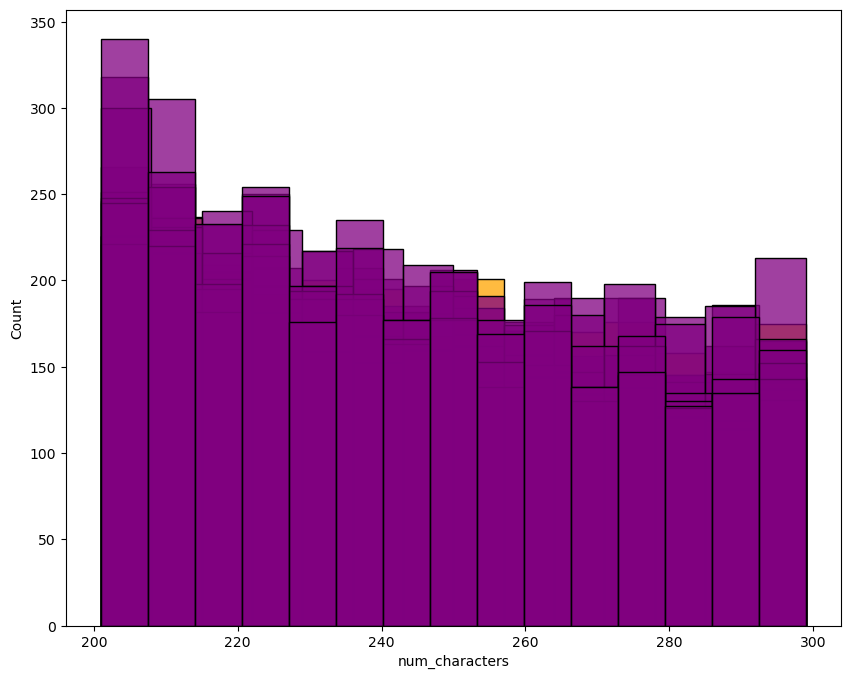

In [178]:
import seaborn as sns

# frequency of the number of characters per text

plt.figure(figsize=(10,8))
sns.histplot(df[df['lang_id'] == 0]['num_characters'], color='orange')
sns.histplot(df[df['lang_id'] == 1]['num_characters'],color='purple')
sns.histplot(df[df['lang_id'] == 2]['num_characters'],color='purple')
sns.histplot(df[df['lang_id'] == 3]['num_characters'],color='purple')
sns.histplot(df[df['lang_id'] == 4]['num_characters'],color='purple')
sns.histplot(df[df['lang_id'] == 5]['num_characters'],color='purple')
sns.histplot(df[df['lang_id'] == 6]['num_characters'],color='purple')
sns.histplot(df[df['lang_id'] == 7]['num_characters'],color='purple')
sns.histplot(df[df['lang_id'] == 8]['num_characters'],color='purple')
sns.histplot(df[df['lang_id'] == 9]['num_characters'],color='purple')
sns.histplot(df[df['lang_id'] == 10]['num_characters'],color='purple')
plt.show()

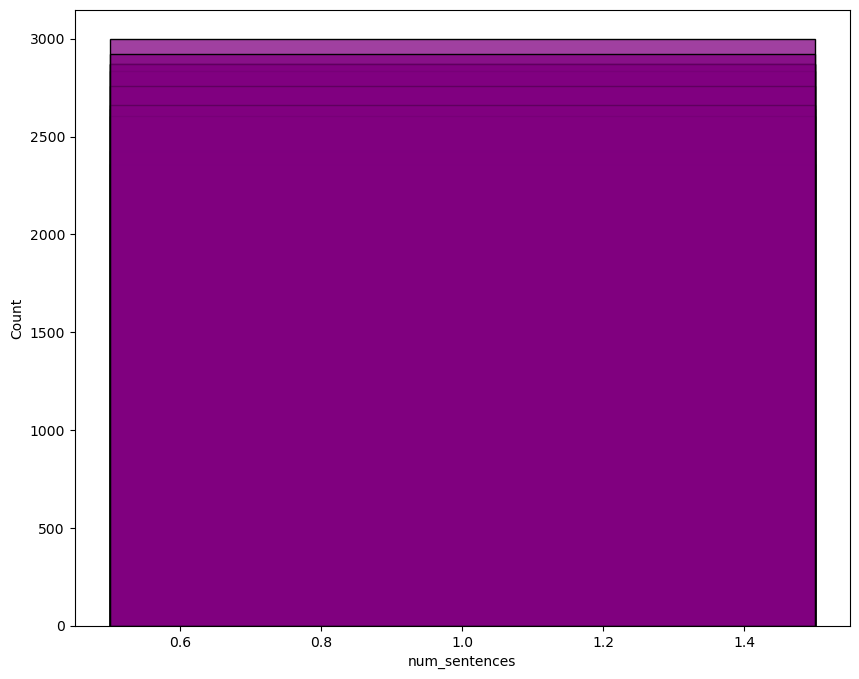

In [179]:
# frequency of the number of sentences per text

plt.figure(figsize=(10,8))
sns.histplot(df[df['lang_id'] == 0]['num_sentences'], color='orange')
sns.histplot(df[df['lang_id'] == 1]['num_sentences'],color='purple')
sns.histplot(df[df['lang_id'] == 2]['num_sentences'],color='purple')
sns.histplot(df[df['lang_id'] == 3]['num_sentences'],color='purple')
sns.histplot(df[df['lang_id'] == 4]['num_sentences'],color='purple')
sns.histplot(df[df['lang_id'] == 5]['num_sentences'],color='purple')
sns.histplot(df[df['lang_id'] == 6]['num_sentences'],color='purple')
sns.histplot(df[df['lang_id'] == 7]['num_sentences'],color='purple')
sns.histplot(df[df['lang_id'] == 8]['num_sentences'],color='purple')
sns.histplot(df[df['lang_id'] == 9]['num_sentences'],color='purple')
sns.histplot(df[df['lang_id'] == 10]['num_sentences'],color='purple')
plt.show()

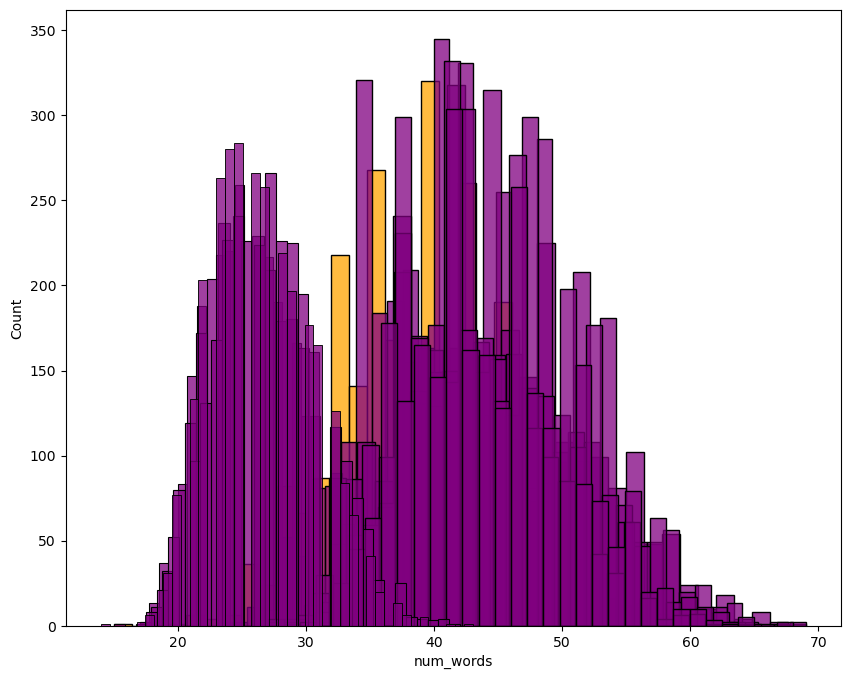

In [180]:
# frequency of the number of words per text

plt.figure(figsize=(10,8))
sns.histplot(df[df['lang_id'] == 0]['num_words'], color='orange')
sns.histplot(df[df['lang_id'] == 1]['num_words'],color='purple')
sns.histplot(df[df['lang_id'] == 2]['num_words'],color='purple')
sns.histplot(df[df['lang_id'] == 3]['num_words'],color='purple')
sns.histplot(df[df['lang_id'] == 4]['num_words'],color='purple')
sns.histplot(df[df['lang_id'] == 5]['num_words'],color='purple')
sns.histplot(df[df['lang_id'] == 6]['num_words'],color='purple')
sns.histplot(df[df['lang_id'] == 7]['num_words'],color='purple')
sns.histplot(df[df['lang_id'] == 8]['num_words'],color='purple')
sns.histplot(df[df['lang_id'] == 9]['num_words'],color='purple')
sns.histplot(df[df['lang_id'] == 10]['num_words'],color='purple')
plt.show()

### Data Preprocessing

1. Lowercase
2. Tokenization
3. Removing Special Character
4. Removing stop words and punctuation
5. stemming

In [181]:
# Write a function to remove punctucation, stopwords followed by stemming

from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer

ps = PorterStemmer()

def text_processing(text):
    text = nltk.word_tokenize(text.lower())
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            stemming = ps.stem(i)
            y.append(stemming)
            
    return " ".join(y)

In [182]:
text_processing('umgaqo-siseko wenza amalungiselelo kumaziko ax')

'wenza amalungiselelo kumaziko ax'

In [185]:
df['new_text'] = df['text'].apply(text_processing)

In [186]:
df.head()

,lang_id,text,num_characters,num_words,num_sentences,new_text
0,9,umgaqo-siseko wenza amalungiselelo kumaziko ax...,220,24,1,wenza amalungiselelo kumaziko axhasa ulawulo l...
1,9,i-dha iya kuba nobulumko bokubeka umsebenzi na...,252,31,1,iya kuba nobulumko bokubeka umsebenzi naphi na...
2,1,the province of kwazulu-natal department of tr...,264,37,1,provinc depart transport invit tender establis...
3,3,o netefatša gore o ba file dilo ka moka tše le...,217,40,1,netefatša gore ba file dilo ka moka tše le dum...
4,8,khomishini ya ndinganyiso ya mbeu yo ewa maana...,239,43,1,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [207]:
# Converting the label to List of Words

x = df[df['lang_id'] == 0]['new_text'].str.cat(sep= " ")
text_msg_word_list = x.split()
len(text_msg_word_list)

94353

In [208]:
# Converting the label to List of Words

x = df[df['lang_id'] == 1]['new_text'].str.cat(sep= " ")
text_msg_word_list = x.split()
len(text_msg_word_list)

64384

In [209]:
# Converting the label to List of Words

x = df[df['lang_id'] == 2]['new_text'].str.cat(sep= " ")
text_msg_word_list = x.split()
len(text_msg_word_list)

59191

In [210]:
# Converting the label to List of Words

x = df[df['lang_id'] == 3]['new_text'].str.cat(sep= " ")
text_msg_word_list = x.split()
len(text_msg_word_list)

122349

In [211]:
# Converting the label to List of Words

x = df[df['lang_id'] == 4]['new_text'].str.cat(sep= " ")
text_msg_word_list = x.split()
len(text_msg_word_list)

122149

In [213]:
# Converting the label to List of Words

x = df[df['lang_id'] == 5]['new_text'].str.cat(sep= " ")
text_msg_word_list = x.split()
len(text_msg_word_list)

62435

In [214]:
# Converting the label to List of Words

x = df[df['lang_id'] == 6]['new_text'].str.cat(sep= " ")
text_msg_word_list = x.split()
len(text_msg_word_list)

121075

In [215]:
# Converting the label to List of Words

x = df[df['lang_id'] == 7]['new_text'].str.cat(sep= " ")
text_msg_word_list = x.split()
len(text_msg_word_list)

113674

In [216]:
# Converting the label to List of Words

x = df[df['lang_id'] == 8]['new_text'].str.cat(sep= " ")
text_msg_word_list = x.split()
len(text_msg_word_list)

108685

In [217]:
# Converting the label to List of Words

x = df[df['lang_id'] == 9]['new_text'].str.cat(sep= " ")
text_msg_word_list = x.split()
len(text_msg_word_list)

70206

In [218]:
# Converting the label to List of Words

x = df[df['lang_id'] == 10]['new_text'].str.cat(sep= " ")
text_msg_word_list = x.split()
len(text_msg_word_list)

75700

In [219]:
# Counting Top 10 Words from the text

from collections import Counter
text_top_10words = pd.DataFrame(Counter(text_msg_word_list).most_common(10))
text_top_10words.head()

,0,1
0,noma,1743
1,kany,957
2,ukuthi,876
3,uma,731
4,futhi,590


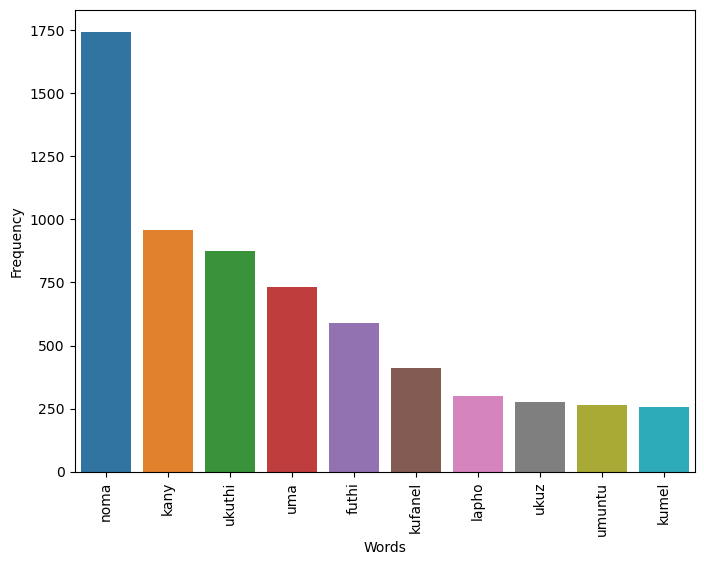

In [220]:
# Bar plot of top 10 text words


plt.figure(figsize=(8, 6))
sns.barplot(x= text_top_10words[0], y= text_top_10words[1])
plt.xticks(rotation=90)
plt.xlabel('Words')  
plt.ylabel('Frequency')  
plt.show()

### Model Building 

In [222]:
# First we will convert the text to vectors using the bag of words technique 

from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features=3000)

In [225]:
X = tf.fit_transform(df['new_text']).toarray()

X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [227]:
y = np.array(df['lang_id'])

y

array([9, 9, 1, ..., 1, 9, 4])

In [228]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=48,test_size=0.30)

In [229]:
X_train.shape

(20963, 3000)

In [230]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,f1_score

gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

def model_scoring(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    f1score = f1_score(y_test, pred)
    return f1score

# list of models to evaluate
models = [gnb, bnb, mnb]

f1_scores = []

for model in models:
    f1score = model_scoring(model, X_train, X_test, y_train, y_test)
    f1_scores.append(f1score)

# Plotting F1 scores

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots()
rects = ax.bar(x, f1_scores, width)

ax.set_ylabel('F1 Score')
ax.set_title('F1 Scores by Model')
ax.set_xticks(x)
ax.set_xticklabels(models)

plt.show()





